#  Plot comparisons

* Should start to adopt postopus
* Time and N iterations 
* ~Rel density and total density

In [42]:
import itertools
%load_ext autoreload
%autoreload 2

import numpy as np
import enum
import matplotlib.pyplot as plt

from oct_utils import ConvergenceData, parse_profiling



# For timings, either want 
# Walltime:  08.244s from std.out 
# or
# COMPLETE_RUN from profiling/time.000000

# conv_no_pre = ConvergenceData(f'no_preconditioning/{file}')
# conv_pre = ConvergenceData(f'preconditioning/{file}')
# data_no_pre = np.column_stack((conv_no_pre.get('iter'), conv_no_pre.get('rel_dens')))
# data_pre = np.column_stack((conv_pre.get('iter'), conv_pre.get('rel_dens')))

files = ['1ALA_broyden']


def initialise_subplot(n_rows: int, n_cols: int):
    # Plot settings
    # n_rows = math.ceil(len(system_names) / n_cols)
    assert n_rows > 0, "Must have at least one row"
    assert n_cols > 0, "Must have at least one column"

    # Calculate the aspect ratio of standard A4
    aspect_ratio = 297.0 / 210.0

    # Calculate the width of the figure in inches
    fig_width = 8.3  # A4 width in inches (approx)

    # Calculate the height of the figure in inches to maintain aspect ratio
    fig_height = fig_width / aspect_ratio * (n_rows / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    fig.set_tight_layout(True)
    return fig, axs
    
    
# TODO(Alex) Do subplots, exactly how I did with xTB project. 

# def plot_convergence(files, ):
#     nrows =1
#     # Plot histogram next to 
#     ncols = 2
#     fig, axes = plt.subplots(nrows, ncols)
#     
#     # line_width = 2
#     # marker_size = 7
#     # label_size = 14
#     # font_size = 14
#     # leg_font_size = 14
#     
#     plt.yscale('log')
#     
#     # Initialise counters
#     empty_lims = 0, 0
#     i_cmp = -1
#     
#     for i, j in itertools.product(range(nrows), range(ncols)):
#         i_cmp += 1
#         file = files[i_cmp]
#         
#         no_pre = ConvergenceData(f'no_preconditioning/{file}')
#         pre = ConvergenceData(f'preconditioning/{file}')
#             
#         plt.plot(no_pre.data[:, 0], no_pre.data[:, 4], label='No Preconditioner')
#         plt.plot(pre.data[:, 0], pre.data[:, 4], label='Preconditioner')
#         plt.legend()
# 



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


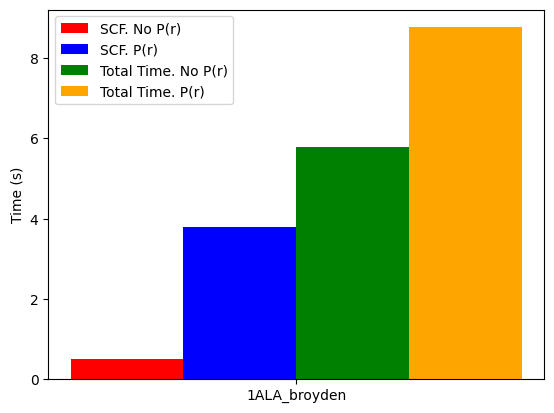

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

from oct_utils import parse_profiling


def bar_chart_data_single_field(files, field1: str, field2: str):
    """
    Return a single data field, for all systems
    :param files: 
    :return: 
    """
    values = []
    for file in files:
        data = parse_profiling(file)
        values.append(data['cumulative'][field1][field2])
    return values


def bar_plot(systems: List[str], fields: List[dict], width = 0.27):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x_dummy = np.arange(len(systems))  # the x locations for the groups
    
    plots = []
    field_labels = []
    for i, field in enumerate(fields):
        plots.append(ax.bar(x_dummy + (i * width), field['data'], width, color=field['color']))
        field_labels.append(field['label'])

    ax.set_ylabel('Time (s)')
    n = len(fields)
    ax.set_xticks(x_dummy + ((n - 1) * 0.5 * width))
    ax.set_xticklabels(systems)
    ax.legend(plots, field_labels)


# TODO (Alex)
# Make the colour scheme a bit smarter, then generalise to n-systems
# Add label of number of SCF iterations, with and without P(r)
# Followed this ref for bar charts: https://stackoverflow.com/questions/14270391/how-to-plot-multiple-bars-grouped

# SCF Time - no preconditioner
files = ['no_preconditioning/1ALA_broyden']
scf_no_pre_values = bar_chart_data_single_field(files, 'SCF_CYCLE', 'TOTAL_TIME')
# Total time - no preconditioner
total_no_pre_values = bar_chart_data_single_field(files, 'COMPLETE_RUN', 'TOTAL_TIME')

# SCF Time - Preconditioner
files = ['preconditioning/1ALA_broyden']
scf_pre_values = bar_chart_data_single_field(files, 'SCF_CYCLE', 'TOTAL_TIME')
# Total time - Preconditioner
total_pre_values = bar_chart_data_single_field(files, 'COMPLETE_RUN', 'TOTAL_TIME')


fields = [{'data': scf_no_pre_values, 'label': 'SCF. No P(r)', 'color': 'r'},
          {'data': scf_pre_values, 'label': 'SCF. P(r)', 'color': 'b'},
          {'data': total_no_pre_values, 'label': 'Total Time. No P(r)', 'color': 'g'},
          {'data': total_pre_values, 'label': 'Total Time. P(r)', 'color': 'orange'}]

systems = ['1ALA_broyden']
bar_plot(systems, fields)
